In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [24]:
def show_image_info(image_np, title = ""):
    plt.figure(figsize=(9, 3))
    plt.subplot(1, 3 ,1)
    plt.imshow(image_np, cmap='gray', vmin=0, vmax=255)
    plt.title(title)
    
    plt.subplot(1, 3, 2)
    plt.hist(image_np.flatten(), bins=256, range=(0, 255), density=True, color='blue', alpha=0.75)
    plt.title('PMF')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 3)
    plt.hist(image_np.flatten(), bins=256, range=(0, 255), cumulative=True, density=True, color='green', alpha=0.75)
    plt.title('CDF')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Cumulative Frequency')
    plt.tight_layout()
    plt.show()

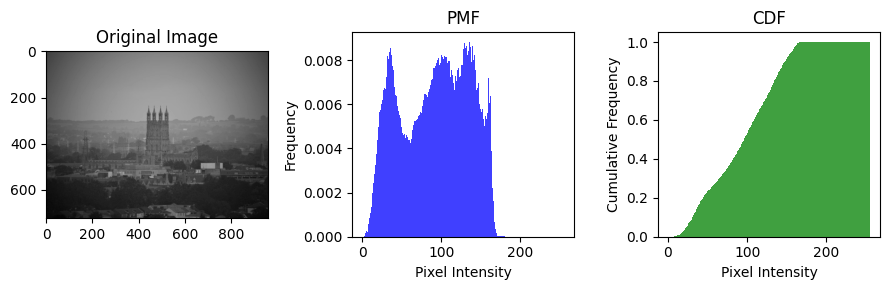

In [25]:
filepath = "./wallpaper.png"
image = Image.open(filepath).convert('L')  
image_np = np.array(image)  
show_image_info(image_np, "Original Image")

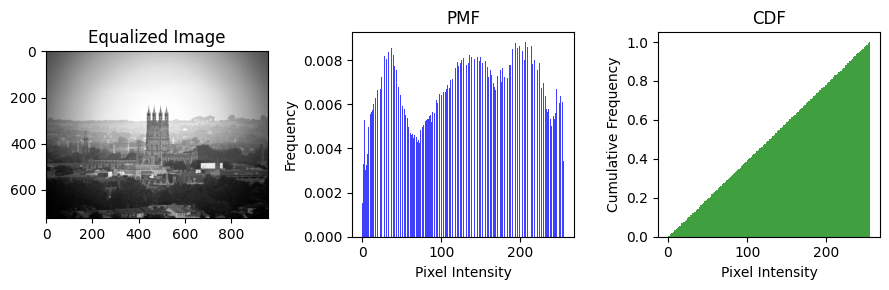

In [30]:

histogram, bins = np.histogram(image_np.flatten(), bins=256, range=[0, 256])
cdf = histogram.cumsum()  
cdf = cdf / cdf.max()  
r_max,r_min  = 255,0

# Based on the formula: s_k = round(CDF(r_k) * (r_max - r_min))
equalized_image_np = np.round(cdf[image_np] * (r_max - r_min)).astype(np.uint8)

equalized_image = Image.fromarray(equalized_image_np)  
equalized_image.save('equalized_image.jpg')  
show_image_info(equalized_image_np, "Equalized Image")